# Linear Regression using SciKit-Learn
----
In the previous tutorial, we learnt how to fit a regression line using the method of least squares.   
   
In this tutorial, you will be introduced to a very useful Python library called scikit-learn. This library contains many functions which are designed to make machine learning quick and easy for Python programmers.

## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

**Next** we will load our data as a Pandas DataFrames.   

In [2]:
df = pd.read_csv('data_1.csv', index_col=0)
df.head(5)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


Cool, so we have monthly data on the Rand exchange rates!   

**Let's plot** the ZAR/USD exchange rate and the value of exports over time

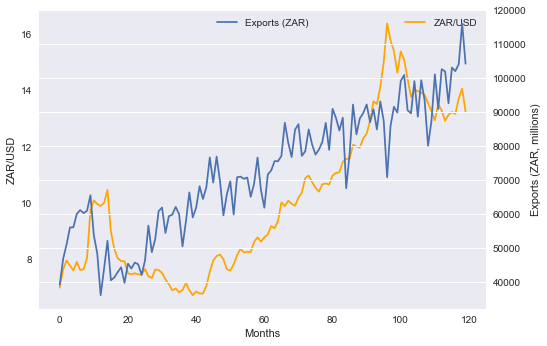

In [3]:
y = df['ZAR/USD'].values
X = df.drop('ZAR/USD', axis=1).values

rc('mathtext', default='regular')
# create blank figure
fig = plt.figure()

# split figure to allow two sets of y axes
ax = fig.add_subplot(111)

# plot the first line on its axis
ax.plot(np.arange(len(y)), y, '-', label = 'ZAR/USD', color='orange')

# create second y axis and plot second line
ax2 = ax.twinx()
ax2.plot(np.arange(len(X)), X, '-', label = 'Exports (ZAR)')

# add legends for each axis
ax.legend(loc=0)
ax2.legend(loc=9)

ax.grid()

# set labels of axes
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")
plt.show()

Above we can see the ZAR/USD exchange rate over a period of 120 months, starting in 2008.   
   
**Next**, let's load some data for some other economic indicators.

**Finally**, let's merge all of these datasets together to make one.

## Let's try to predict the Rand exchange rate   

Now that we have all of our data in one neat DataFrame, let's see what we can do with machine learning.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()

In [6]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
b = float(lm.intercept_)

In [8]:
a = lm.coef_

In [9]:
print("Slope:\t\t", a)
print("Intercept:\t", float(b))

Slope:		 [ 0.00011351]
Intercept:	 1.8448114670426445


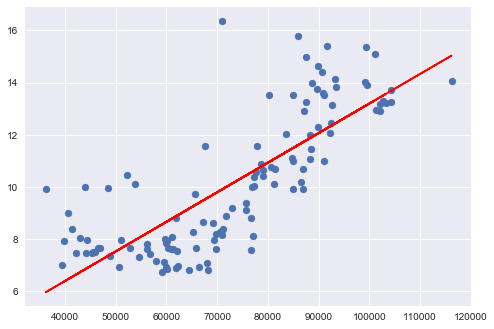

In [10]:
# generate values of y from x, using the linear model
gen_y = lm.predict(X)

# plot the results
plt.scatter(X, y)  # plot the original data
plt.plot(X, gen_y, color='red')  # plot the line connecting the generated y-values
plt.show()

## Assessing the model accuracy
We can measure the overall error of the fit by calculating the **Residual Sum of Squares**:
   
$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [11]:
print("Residual sum of squares:", ((lm.predict(X) - y) ** 2).sum())

Residual sum of squares: 321.457166553


### sk-learn metrics
There is another Python library which will make things easier for us to assess the fit of our model.   
   
In addition to RSS, there are some other metrics we can use:

**Mean Squared Error:**
$$MSE = \frac{RSS}{n}$$   
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$   
   
**R squared:**
$$R^2 = 1 - \frac{RSS}{TSS}$$   
$$R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$

In [12]:
from sklearn import metrics

In [13]:
fit_lm = lm.predict(X)

print('MSE:', metrics.mean_squared_error(y, fit_lm))

MSE: 2.67880972127


In [14]:
print('R_squared:', metrics.r2_score(y, fit_lm))

R_squared: 0.61584174769


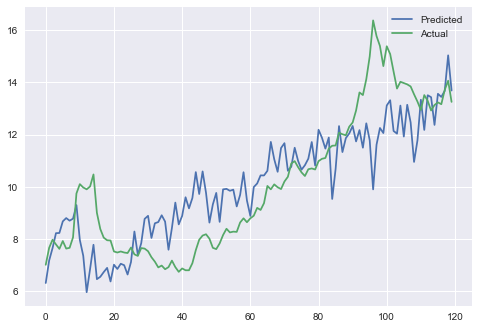

In [15]:
plt.plot(np.arange(len(X)), lm.predict(X), label='Predicted')
plt.plot(np.arange(len(y)), y, label='Actual')
plt.legend()
plt.show()

----
So our first model is not too great! The general trend is there, but we have missed a lot of the seasonal variability in the exchange rate.

**To summarise:**   
We learnt how to:
* use scikit-learn to perform ordinary least squares regression.   
* use scikit-learn to assess model performance using metrics such as $MSE$ and $R^2$.   

In future tutorials, we will look at methods for improving the predictive accuracy of our model.